In [99]:
import pandas
import random
import numpy as np
from scipy.stats import ttest_ind

In [2]:
df = pandas.read_csv("English_past_trimmed.csv")

In [3]:
df

,Unnamed: 0,item_condition,X,number,participant,rt,item,prime,target,condition,...,wordlength,similarity,primelength,primeLength.c,targetLength.c,similarity.c,type,condition2,type2,SOA2
0,1,1_11,410,2,5947aea4f236120001ecf9f1,566.315,1,called,CALLED,11,...,6,1.00,6,-0.218259,-0.369744,0.586877,Morphological,Identity,0.5,-0.5
1,2,1_11,11797,40,PARTICIPANT,811.670,1,called,CALLED,11,...,6,1.00,6,-0.218259,-0.369744,0.586877,Morphological,Identity,0.5,-0.5
2,3,1_11,12237,35,5fd249695061f309a109a80a,484.195,1,called,CALLED,11,...,6,1.00,6,-0.218259,-0.369744,0.586877,Morphological,Identity,0.5,0.5
3,4,1_11,2316,8,5c92f797803bff0017fef8dd,563.000,1,called,CALLED,11,...,6,1.00,6,-0.218259,-0.369744,0.586877,Morphological,Identity,0.5,-0.5
4,5,1_11,8782,30,5f9b0a89d54fa92cb708c212,713.065,1,called,CALLED,11,...,6,1.00,6,-0.218259,-0.369744,0.586877,Morphological,Identity,0.5,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33886,33887,99_16,13212,4,597bbb74ae36d500016cb895,550.805,99,unlock,APPEAR,16,...,6,0.08,6,-0.218259,-0.369744,-0.333123,Orthographical,Control,-0.5,-0.5
33887,33888,99_16,15482,3,59d3ab844e58e40001953a51,642.360,99,unlock,APPEAR,16,...,6,0.08,6,-0.218259,-0.369744,-0.333123,Orthographical,Control,-0.5,0.5
33888,33889,99_16,15734,4,59f1de0177860e00015138fe,593.885,99,unlock,APPEAR,16,...,6,0.08,6,-0.218259,-0.369744,-0.333123,Orthographical,Control,-0.5,0.5
33889,33890,99_16,14712,9,5c01758473cbae00010f654a,738.000,99,unlock,APPEAR,16,...,6,0.08,6,-0.218259,-0.369744,-0.333123,Orthographical,Control,-0.5,-0.5


In [64]:
m = df['SOA']=="masked"
masked = df[m]

p = masked['participant']

unique_participant = []
     
    # traverse for all elements
for x in p:
    if x not in unique_participant:
        unique_participant.append(x)

In [78]:
len(unique_participant)

122

In [31]:
m = masked[masked['participant'].isin(part_list)]

In [40]:
m_ortho = m[m['type']=="Orthographical"]

In [51]:
test = m_ortho[m_ortho['condition2']=='Test']
control = m_ortho[m_ortho['condition2']=='Control']

ttest_ind(test['rt'], control['rt'])

Ttest_indResult(statistic=-0.45178160565987857, pvalue=0.651480452343193)

In [81]:
t = []
p = []

for i in range(100):
    a = [random.randint(1,121) for i in range(1, 45)]
    part_list = [unique_participant[i] for i in a]
    m = masked[masked['participant'].isin(part_list)]
    m_ortho = m[m['type']=="Orthographical"]
    
    test = m_ortho[m_ortho['condition2']=='Test']
    control = m_ortho[m_ortho['condition2']=='Control']

    t.append(ttest_ind(test['rt'], control['rt']).statistic)
    p.append(ttest_ind(test['rt'], control['rt']).pvalue)

In [88]:
from statistics import mean
mean(p)

0.45719631510543685

Text(0.5, 1.0, 'p value distribution')

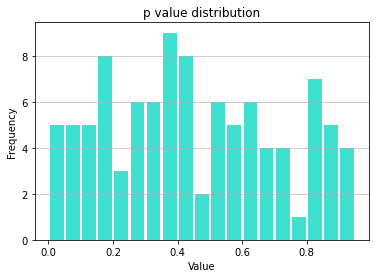

In [103]:
import matplotlib.pyplot as plt

#n, bins, patches = plt.hist(x=p, steps=0.05, color='#0504aa',
#                            alpha=0.7, rwidth=0.85)
plt.hist(p, bins=np.arange(min(p), max(p)+0.01, step=0.05), rwidth=0.85, color='turquoise')

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('p value distribution')

In [106]:
#percentage of p value < 0.05 if # participants = 45

(sum([pv<0.05 for pv in p])/100)*100

5.0